<a href="https://colab.research.google.com/github/percivalyan/trying-colab/blob/main/scaling_sharpen_photo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pillow ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


FileUpload(value={}, accept='image/*', description='Upload')

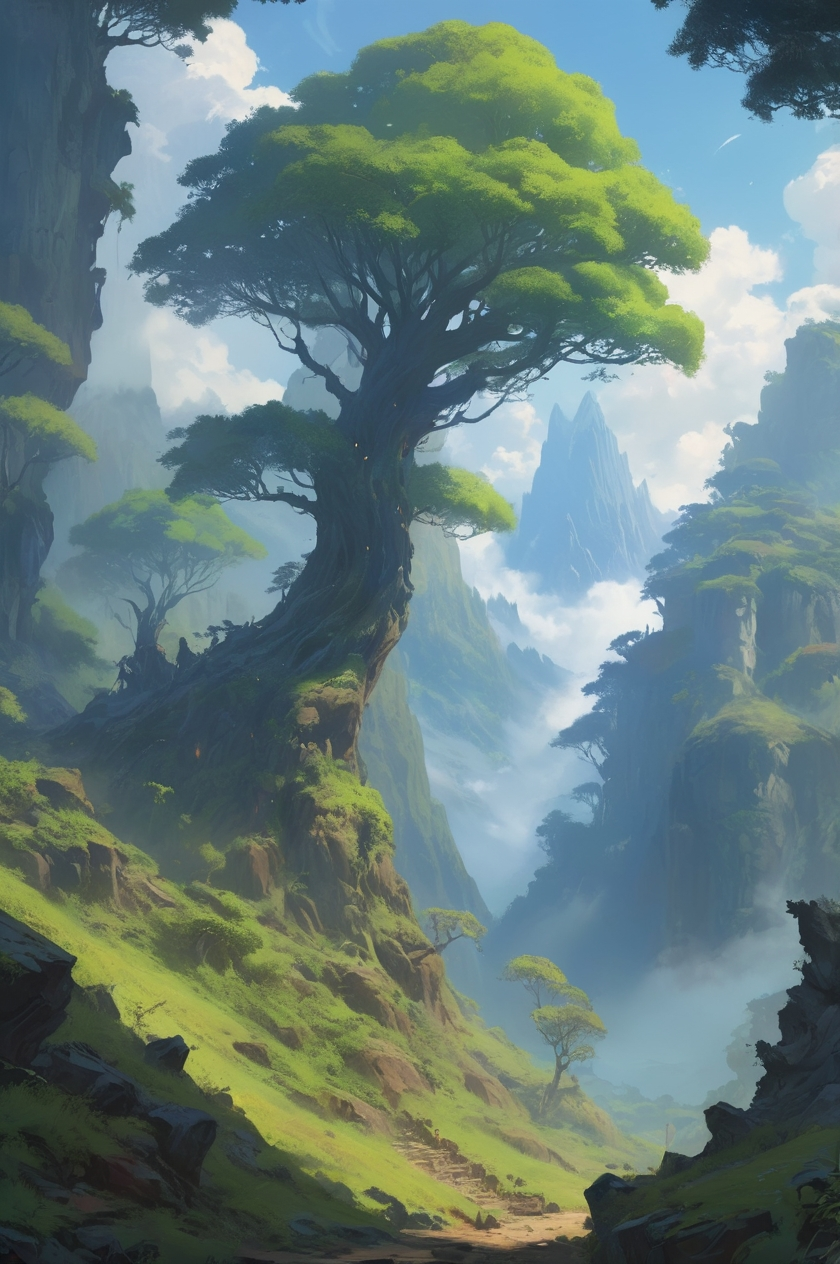

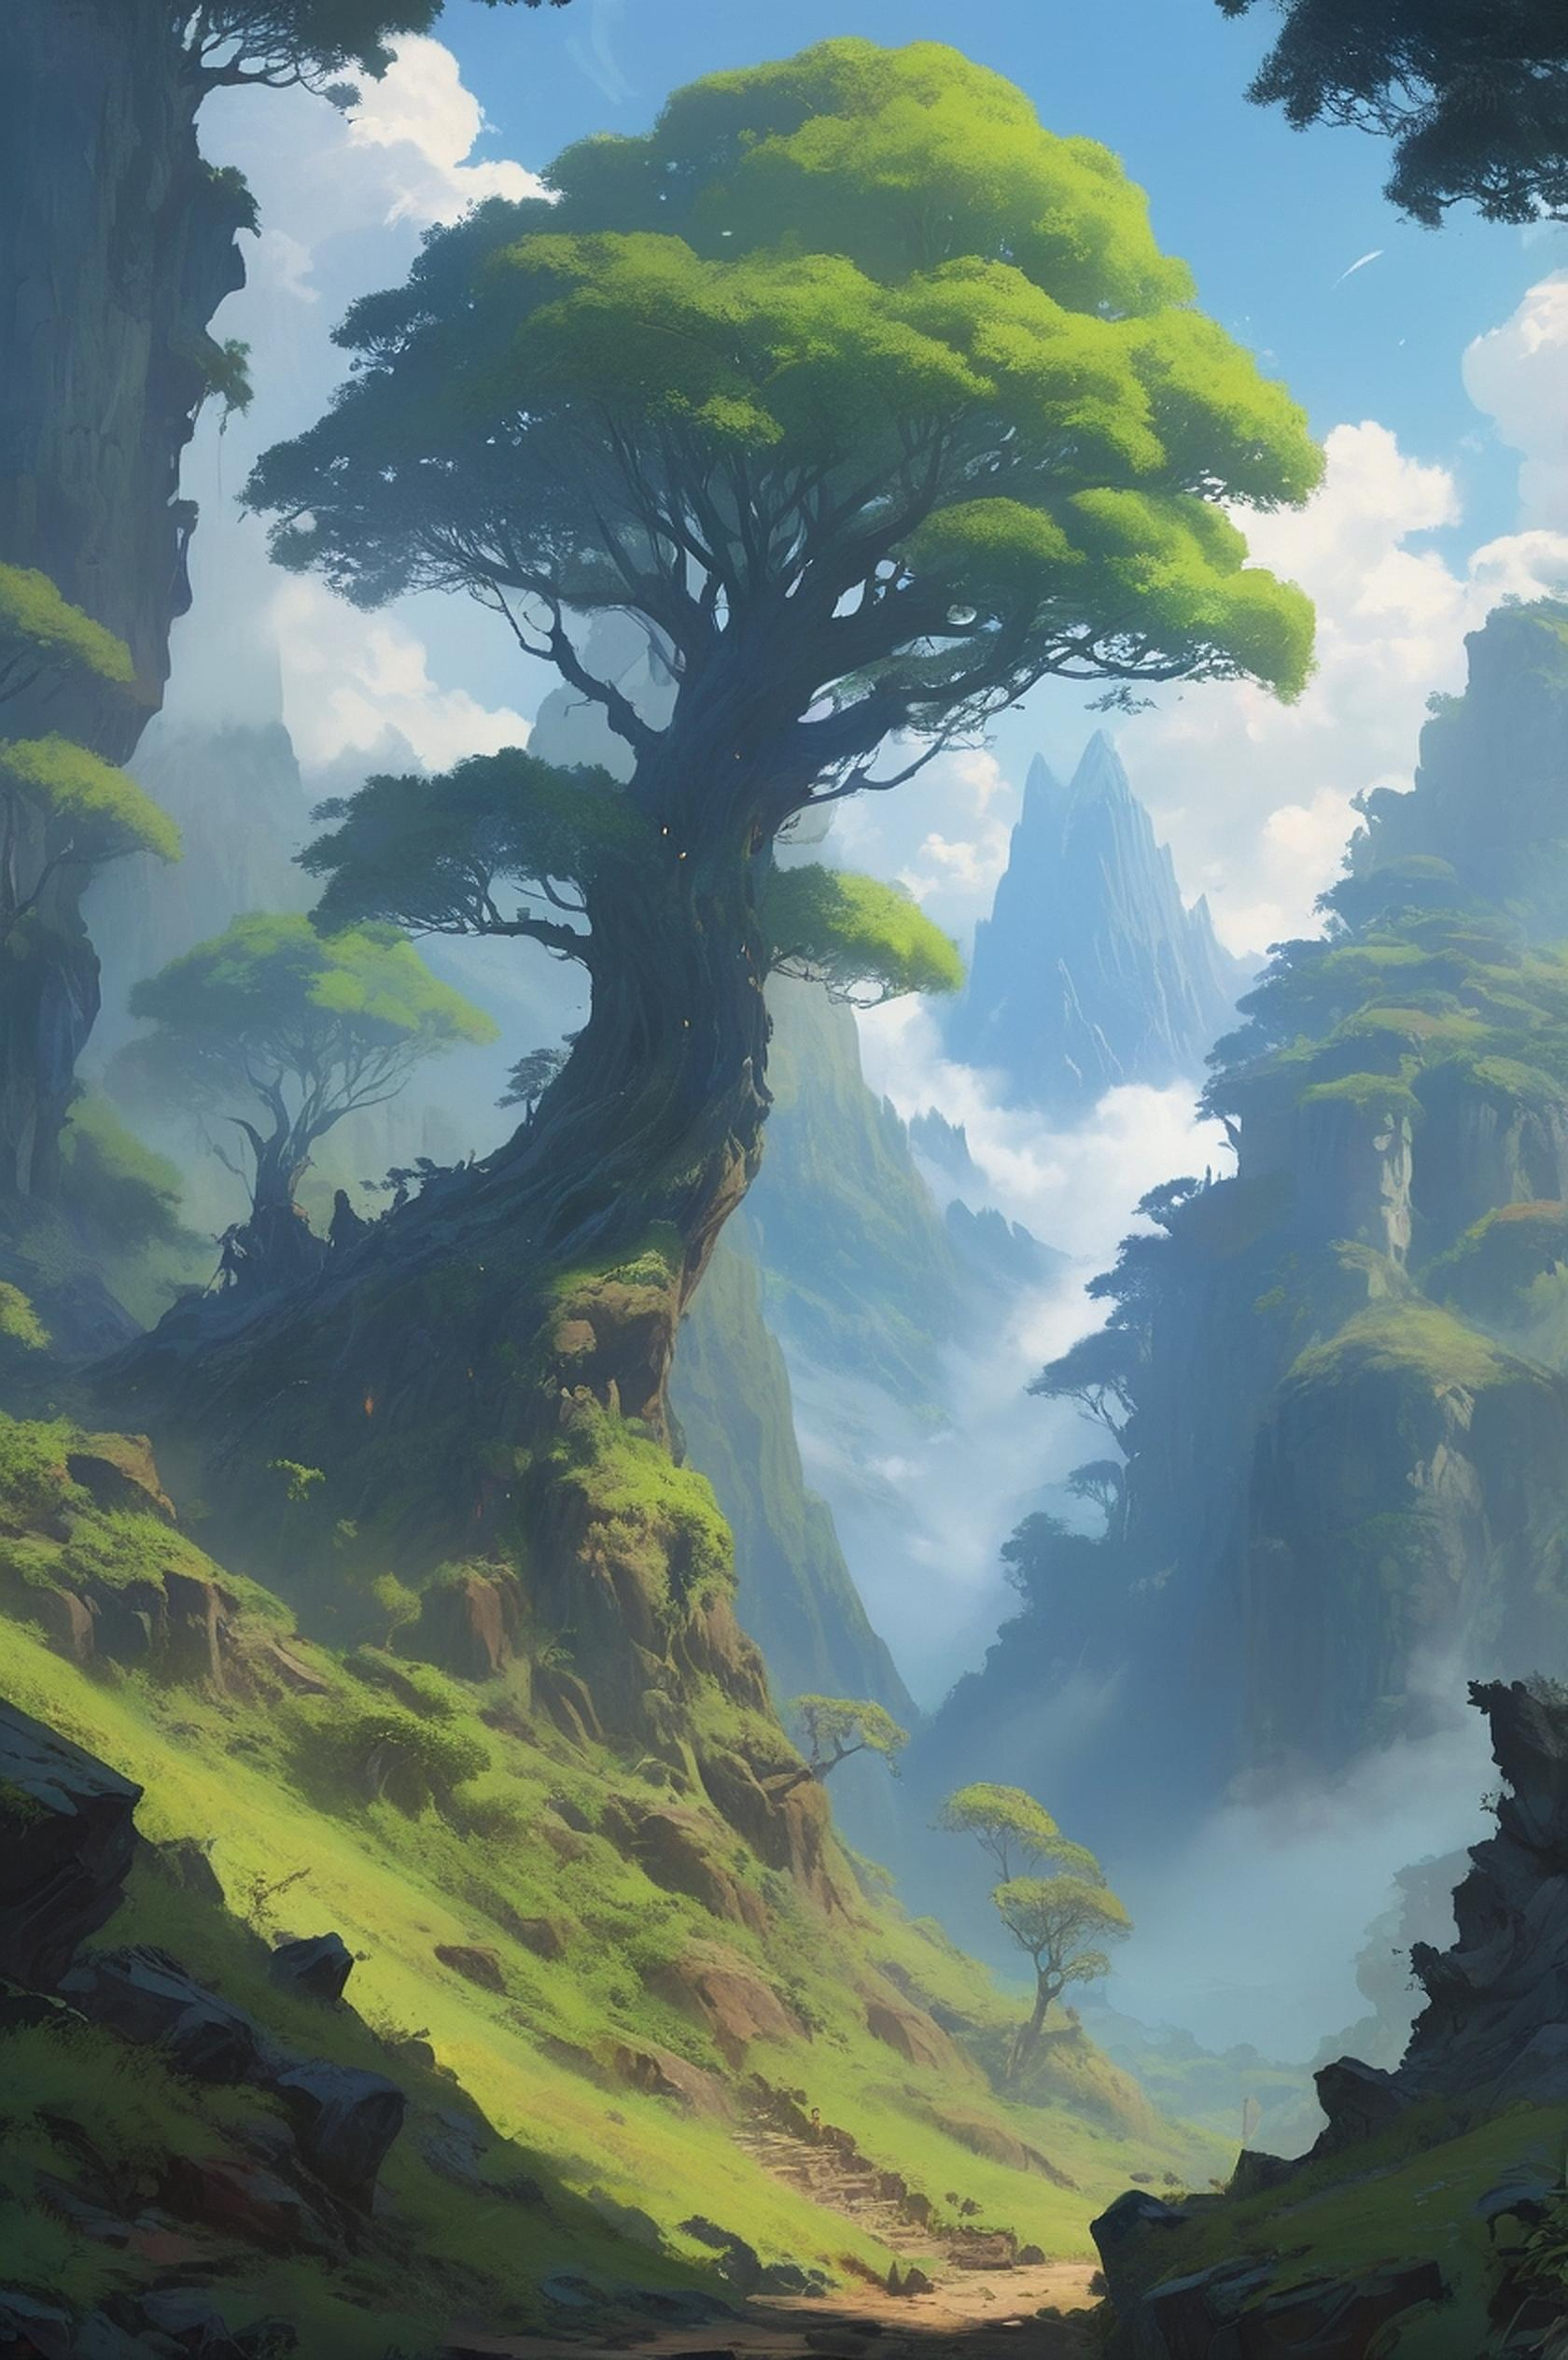

In [3]:
# Mengimpor pustaka yang diperlukan
from PIL import Image, ImageFilter
import ipywidgets as widgets
from IPython.display import display, Image as IPImage
import io

# Fungsi untuk membuka, menampilkan, dan melakukan upscaling serta sharpening gambar
def on_upload_change(change):
    # Ambil file yang diunggah
    file = next(iter(change['new'].values()))
    content = file['content']

    # Membuka gambar dari konten file
    image = Image.open(io.BytesIO(content))

    # Menampilkan gambar yang diunggah
    display(IPImage(data=content))

    # Lakukan upscaling dan sharpening
    processed_image = upscale_and_sharpen(image)

    # Simpan dan tampilkan gambar hasil proses
    processed_image.save('processed_image.jpg')
    display(IPImage('processed_image.jpg'))

# Fungsi untuk melakukan upscaling dan sharpening
def upscale_and_sharpen(image):
    scale_factor = 2  # Contoh: Menggandakan ukuran gambar
    new_size = (int(image.width * scale_factor), int(image.height * scale_factor))

    # Upscaling
    upscaled_image = image.resize(new_size, Image.LANCZOS)

    # Sharpening
    sharpened_image = upscaled_image.filter(ImageFilter.SHARPEN)

    return sharpened_image

# Membuat widget unggah gambar
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
upload_widget.observe(on_upload_change, names='value')

# Menampilkan widget unggah
display(upload_widget)
